<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/03_Unsupervised_modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 11.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=83f76f3d5b06de6ac9e8fc7410971fa64060a1884a620eb9c4e6b1196c90019b
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
questions = pd.read_csv('/content/drive/My Drive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.drop('Unnamed: 0', axis=1)
questions

,Question
0,pandas pandas list dataframe object
1,php string
2,json performance json function select json joi...
3,java java class class static string join join ...
4,stream video browser stream video browser vide...
...,...
39995,scala scala configuration module java scala ty...
39996,flutter function button build function function
39997,routing url browser class import dom class con...
39998,python post twitter post python import import ...


In [5]:
questions['Question'] = questions['Question'].apply(lambda text: str(text).split())

In [6]:
questions = questions['Question'] 
questions.head(10)

0            [pandas, pandas, list, dataframe, object]
1                                        [php, string]
2    [json, performance, json, function, select, js...
3    [java, java, class, class, static, string, joi...
4    [stream, video, browser, stream, video, browse...
5    [pandas, pandas, date, indexing, date, date, d...
6                                           [dns, php]
7    [php, ide, constants, reflection, web, php, ph...
8                                            [process]
9    [jquery, javascript, jquery, javascript, jquer...
Name: Question, dtype: object

In [7]:
wordvec = Word2Vec(questions, min_count=1)

In [8]:
print('wordvec:', wordvec)

wordvec: Word2Vec(vocab=358, size=100, alpha=0.025)


In [9]:
words = list(wordvec.wv.vocab)

In [10]:
print("\nwords", words)


words ['pandas', 'list', 'dataframe', 'object', 'php', 'string', 'json', 'performance', 'function', 'select', 'join', 'date', 'time', 'loops', 'set', 'java', 'class', 'static', 'security', 'exception', 'jvm', 'stream', 'video', 'browser', 'flash', 'http', 'file', 'javascript', 'input', 'web', 'indexing', 'dns', 'ide', 'constants', 'reflection', 'c', 'c++', 'methods', 'process', 'jquery', 'nan', 'linux', 'database', 'caching', 'reference', 'api', 'mysql', 'text', 'button', 'selenium', 'firefox', 'r', 'null', 'import', 'module', 'python', 'post', 'pip', 'build', 'search', 'regex', 'path', 'sql', 'memory', 'bash', 'curl', 'gcc', 'terminal', 'apache', 'hadoop', 'shell', 'spring', 'xcode', 'image', 'configuration', 'angular', 'email', 'constructor', 'tkinter', 'dynamic', 'variables', 'haskell', 'parameters', 'integer', 'android', 'dom', 'html', 'model', 'hibernate', 'github', 'wpf', 'xml', 'url', 'hash', 'pointers', 'session', 'redirect', 'windows', 'ruby', 'rspec', 'scala', 'sorting', 'la

In [11]:
print("\nwordvec['function'] :", wordvec['function'])


wordvec['function'] : [-0.3959463   0.93420184  0.08749527 -0.27240252  0.28610936 -0.2047652
  0.22189601  0.52704537  0.48234943  1.2546793   0.03829161 -0.41650862
  0.32899684 -0.06164584 -0.7385854   0.041194   -0.5877952  -0.12458603
 -0.4017257   0.7623444   0.1928142   0.03870755  1.1282063  -1.0636101
  0.19593254 -0.5155685   0.24569601  0.8502739   0.5790613   1.6373926
  0.47416782 -0.3302328   0.82431644 -0.6930966   0.36863166  0.06949662
 -0.37380612 -1.2707939  -0.08188369 -1.2690535  -0.20540828  2.0775793
  0.04566371 -0.29451543  0.3286985   0.16441107 -0.7620429   1.7116923
 -0.08488588 -0.03987223 -0.9000433  -0.34213856 -1.0215166   0.00899779
 -0.41127032  0.41867876  0.74565554  0.21186471  1.9927958   0.4690378
  1.0615404   0.19718553 -0.11015211 -0.17622751 -0.11417829  0.40388483
 -0.29076383  0.13841653 -0.18924588  0.7203095   1.2455595   0.6260568
 -0.4588504   0.1386395   0.82197744 -1.2277571   0.68956465 -0.28453544
 -0.38488272  0.1898461   0.8443469

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [12]:
wordvec.save('wordvec.bin')

In [13]:
new_wordvec = Word2Vec.load('wordvec.bin')

In [14]:
print("\nloaded wordvec", new_wordvec)


loaded wordvec Word2Vec(vocab=358, size=100, alpha=0.025)


In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [16]:
X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


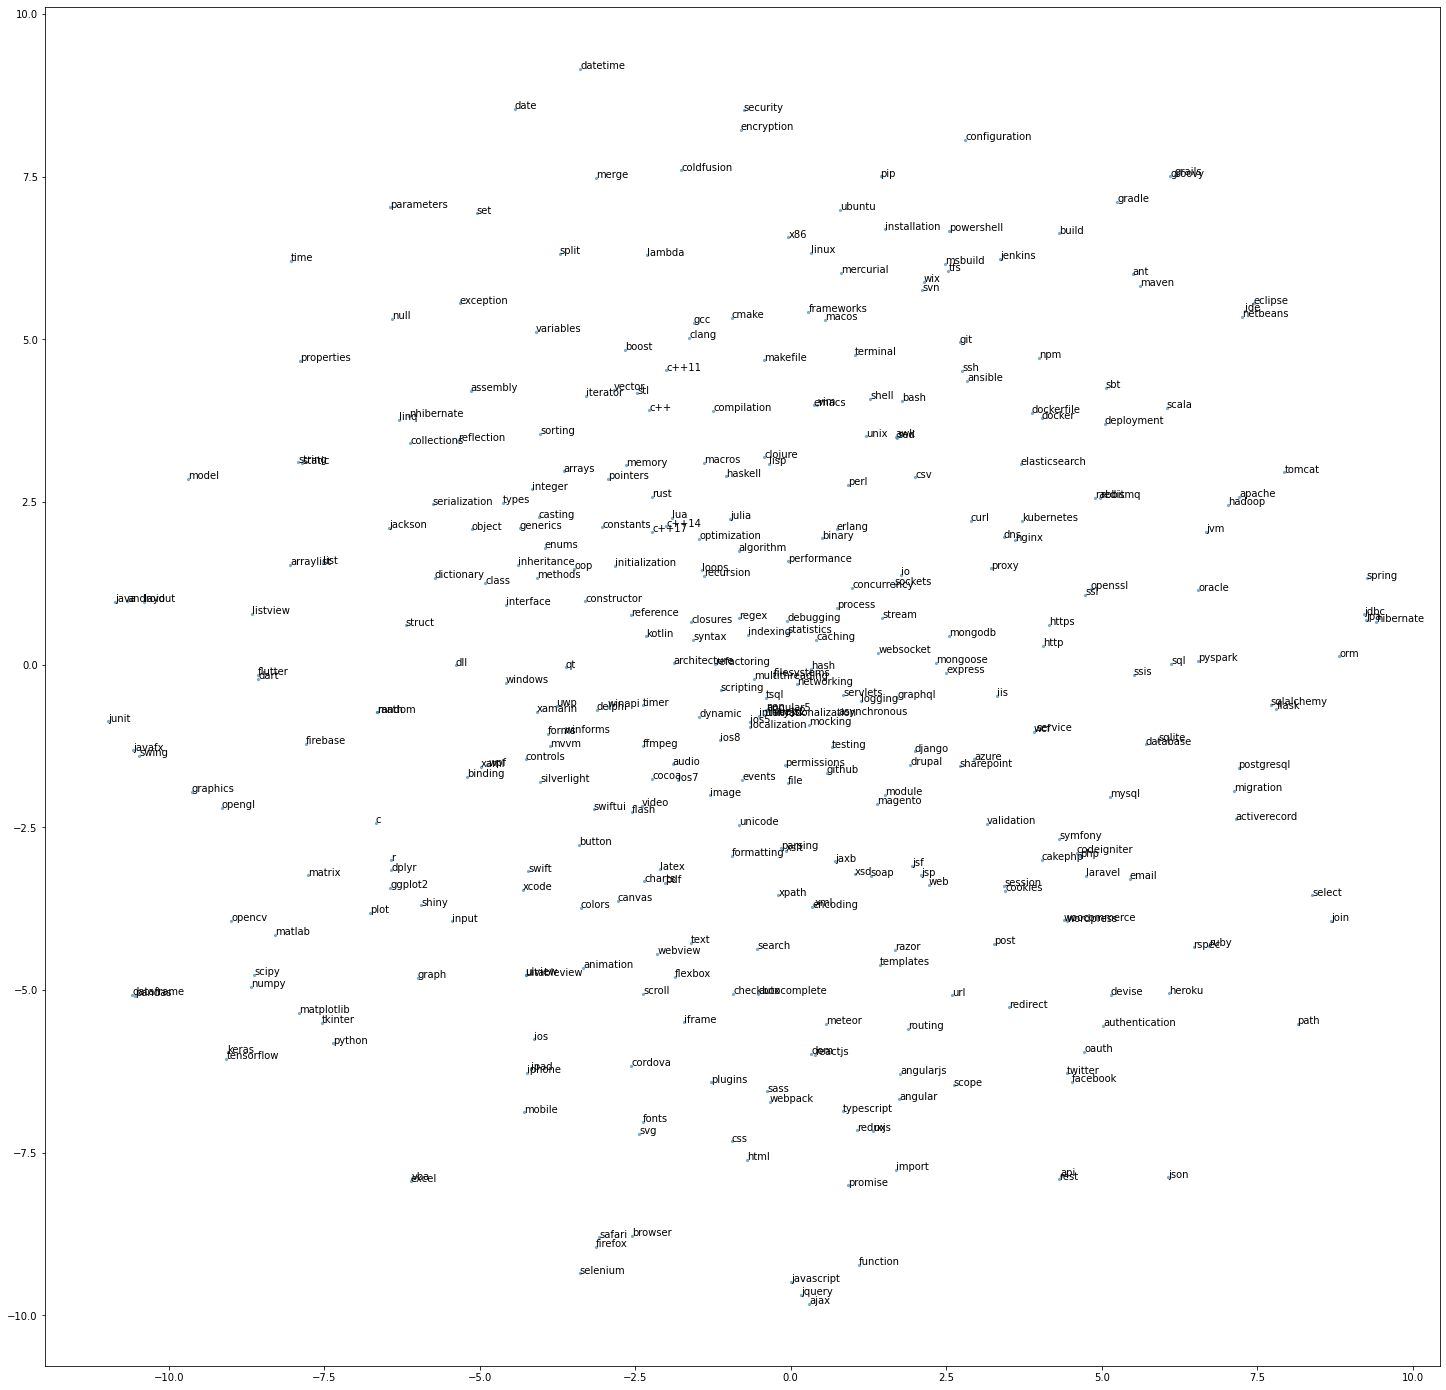

In [17]:
plt.figure(figsize=(25,25))
pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [18]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [19]:
len(dictionary)

358

In [20]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 5), (10, 2), (11, 1), (12, 1), (13, 1), (14, 6)],
 [(5, 1), (8, 2), (15, 4), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1)],
 [(21, 3),
  (22, 2),
  (23, 5),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 11),
  (28, 6),
  (29, 1)],
 [(3, 2), (6, 4), (30, 1)],
 [(4, 1), (31, 1)],
 [(4, 5),
  (7, 1),
  (15, 1),
  (29, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2)],
 [(38, 1)],
 [(7, 1), (26, 2), (39, 3)],
 [(40, 1)],
 [(13, 1), (41, 1), (42, 1)],
 [(9, 3), (14, 1), (43, 1), (44, 1), (45, 1)],
 [(25, 1), (32, 2)],
 [(14, 1), (41, 4), (46, 3), (47, 4)],
 [(2, 1)],
 [(15, 2), (21, 1), (29, 1), (48, 1), (49, 1), (50, 1), (51, 2)],
 [(5, 1), (15, 1), (17, 6), (43, 3), (52, 2)],
 [(2, 3),
  (3, 2),
  (5, 4),
  (6, 2),
  (13, 4),
  (14, 1),
  (16, 1),
  (22, 16),
  (42, 1),
  (53, 2),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 22),
  (58, 3),
  (59, 12),
  (60, 1),
  (61, 3),
  (62, 1)],
 [(1, 1), (6

In [24]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=5, num_words=5))

In [28]:
from gensim.models import CoherenceModel

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values =[]
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [32]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions, start=2, limit=40, step=2) 

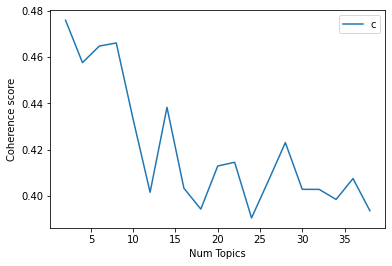

In [33]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
for nt, cs in zip(x, coherence_values):
  print("Num Topics =", nt, "is having Coherence score of", round(cs, 4))

Num Topics = 2 is having Coherence score of 0.4759
Num Topics = 4 is having Coherence score of 0.4576
Num Topics = 6 is having Coherence score of 0.4647
Num Topics = 8 is having Coherence score of 0.4661
Num Topics = 10 is having Coherence score of 0.433
Num Topics = 12 is having Coherence score of 0.4015
Num Topics = 14 is having Coherence score of 0.4382
Num Topics = 16 is having Coherence score of 0.4033
Num Topics = 18 is having Coherence score of 0.3943
Num Topics = 20 is having Coherence score of 0.4129
Num Topics = 22 is having Coherence score of 0.4145
Num Topics = 24 is having Coherence score of 0.3905
Num Topics = 26 is having Coherence score of 0.4066
Num Topics = 28 is having Coherence score of 0.423
Num Topics = 30 is having Coherence score of 0.4028
Num Topics = 32 is having Coherence score of 0.4028
Num Topics = 34 is having Coherence score of 0.3984
Num Topics = 36 is having Coherence score of 0.4075
Num Topics = 38 is having Coherence score of 0.3936


In [39]:
lda = gensim.models.ldamodel.LdaModel

In [40]:
ldamodel = lda(corpus, num_topics=8, id2word = dictionary, passes=50)

In [41]:
print("LDA model is: \n", ldamodel.print_topics(num_topics=8, num_words=10))

LDA model is: 
 [(0, '0.316*"class" + 0.119*"object" + 0.092*"null" + 0.053*"static" + 0.031*"angular" + 0.030*"methods" + 0.027*"set" + 0.027*"interface" + 0.024*"webpack" + 0.024*"ruby"'), (1, '0.146*"text" + 0.092*"html" + 0.085*"url" + 0.073*"input" + 0.058*"web" + 0.046*"post" + 0.044*"javascript" + 0.043*"css" + 0.039*"jquery" + 0.035*"xml"'), (2, '0.313*"java" + 0.083*"image" + 0.061*"service" + 0.049*"http" + 0.040*"spring" + 0.039*"apache" + 0.035*"exception" + 0.030*"web" + 0.023*"io" + 0.023*"configuration"'), (3, '0.272*"file" + 0.078*"python" + 0.075*"build" + 0.073*"path" + 0.046*"module" + 0.039*"windows" + 0.031*"process" + 0.028*"gradle" + 0.023*"linux" + 0.022*"import"'), (4, '0.234*"c" + 0.149*"list" + 0.076*"model" + 0.031*"c++" + 0.022*"set" + 0.022*"hibernate" + 0.021*"dll" + 0.020*"vector" + 0.020*"matrix" + 0.020*"docker"'), (5, '0.359*"android" + 0.117*"button" + 0.105*"r" + 0.101*"layout" + 0.033*"ios" + 0.030*"video" + 0.024*"stream" + 0.019*"scroll" + 0.017*

In [42]:
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [43]:
lda_visualisation = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualisation)